In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



In [2]:
# Ruta del archivo Excel
ruta_archivo = "C://Users//Alienware X15//Desktop//tesis//BDlimpio.xlsx"
#df = pd.read_excel(ruta_archivo,sheet_name="Valores")

# Leer el archivo Excel y seleccionar solo las columnas "A", "C", y "E"
df = pd.read_excel(ruta_archivo,usecols=["pH_CAMPO", "TEMP_AGUA", "TEMP_AMB", "OD_%", "SDT","N_TOT","DQO_TOT","DBO_TOT","COLI_FEC","E_COLI"],)

# Mostrar las primeras filas del DataFrame
print(df.head())

   COLI_FEC  E_COLI  DBO_TOT  DQO_TOT    N_TOT     SDT  pH_CAMPO   OD_%  \
0     24196   24196     4.11  27.8784  33.7438  433.28      7.97   85.8   
1     24196    3654     6.65  16.1600   8.3008  306.56      8.02   89.8   
2       663     109     2.33  25.4700  14.6639  748.80      8.27  127.6   
3     24196     860    11.42  32.8000  12.6635  581.76      7.97   85.5   
4     24196     480     3.34  30.0960  18.1750  651.52      8.14   90.5   

   TEMP_AMB  TEMP_AGUA  
0      26.7       24.3  
1      34.6       25.8  
2      37.4       33.1  
3      33.0       29.0  
4      34.8       29.9  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COLI_FEC   3017 non-null   int64  
 1   E_COLI     3017 non-null   int64  
 2   DBO_TOT    3017 non-null   float64
 3   DQO_TOT    3017 non-null   float64
 4   N_TOT      3017 non-null   float64
 5   SDT        3017 non-null   float64
 6   pH_CAMPO   3017 non-null   float64
 7   OD_%       3017 non-null   float64
 8   TEMP_AMB   3017 non-null   float64
 9   TEMP_AGUA  3017 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 235.8 KB


In [10]:
# -------------------------
# IDENTIFICAR Y ELIMINAR OUTLIERS EN LA COLUMNA P_TOT USANDO IQR
# -------------------------
# Calcular el rango intercuartílico (IQR)
Q1 = df['N_TOT'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['N_TOT'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y eliminar outliers
df_sin_outliers = df[~((df['N_TOT'] < lower_bound) | (df['N_TOT'] > upper_bound))]

# Mostrar la cantidad de filas originales y el nuevo DataFrame sin outliers
print(f'Número de filas originales: {df.shape[0]}')
print(f'Número de filas después de eliminar outliers: {df_sin_outliers.shape[0]}')

# Mostrar las primeras filas del nuevo DataFrame sin outliers
print(df_sin_outliers.head())

Número de filas originales: 3017
Número de filas después de eliminar outliers: 2625
    COLI_FEC  E_COLI  DBO_TOT  DQO_TOT     N_NO3     N_TOT  ORTO_PO4      SDT  \
6      24196     613     4.00   10.000  4.557000  4.616000   0.04100  581.120   
16     24196    1014     2.00   10.000  3.497175  5.124123   0.16060  292.480   
22     15531    1354     2.00   14.210  3.239100  4.092270   0.09914  318.080   
23      1162      41     2.00   61.320  4.363910  4.693780   0.02739  476.800   
68      4352     211     5.98   34.993  0.195100  0.420800   0.02540  125.632   

    pH_CAMPO   OD_%  TEMP_AMB  TEMP_AGUA  
6       8.30   87.1      38.0       32.7  
16      8.10   77.5      32.0       22.7  
22      8.30   80.5      28.0       25.1  
23      8.30  122.8      29.0       27.2  
68      8.16   98.8      26.4       22.0  


In [4]:

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Crear una copia del DataFrame para aplicar la normalización
df_normalizado = df.copy()

# Normalizar las columnas específicas del DataFrame
df_normalizado['OD_%'] = scaler.fit_transform(df_normalizado[['OD_%']])
df_normalizado['N_TOT'] = scaler.fit_transform(df_normalizado[['N_TOT']])
df_normalizado['SDT'] = scaler.fit_transform(df_normalizado[['SDT']])
df_normalizado['TEMP_AGUA'] = scaler.fit_transform(df_normalizado[['TEMP_AGUA']])
df_normalizado['TEMP_AMB'] = scaler.fit_transform(df_normalizado[['TEMP_AMB']])
df_normalizado['pH_CAMPO'] = scaler.fit_transform(df_normalizado[['pH_CAMPO']])
df_normalizado['DQO_TOT'] = scaler.fit_transform(df_normalizado[['DQO_TOT']])
df_normalizado['DBO_TOT'] = scaler.fit_transform(df_normalizado[['DBO_TOT']])
df_normalizado['COLI_FEC'] = scaler.fit_transform(df_normalizado[['COLI_FEC']])
df_normalizado['E_COLI'] = scaler.fit_transform(df_normalizado[['E_COLI']])



# Guardar el DataFrame normalizado en un archivo Excel
#df_normalizado.to_excel('df_normalizado.xlsx', index=False)

# Mostrar las primeras filas del DataFrame normalizado
print(df_normalizado.head())


   COLI_FEC    E_COLI   DBO_TOT   DQO_TOT     N_TOT       SDT  pH_CAMPO  \
0  0.001000  0.001000  0.004121  0.016188  0.427296  0.007669  0.477143   
1  0.001000  0.000151  0.009083  0.005578  0.105022  0.005196  0.491429   
2  0.000027  0.000004  0.000645  0.014008  0.185620  0.013827  0.562857   
3  0.001000  0.000036  0.018400  0.020645  0.160282  0.010567  0.477143   
4  0.001000  0.000020  0.002617  0.018196  0.230093  0.011928  0.525714   

       OD_%  TEMP_AMB  TEMP_AGUA  
0  0.404482  0.443750   0.337963  
1  0.425827  0.690625   0.407407  
2  0.627535  0.778125   0.745370  
3  0.402882  0.640625   0.555556  
4  0.429562  0.696875   0.597222  


X_train_scaled shape: (2413, 9)
X_test_scaled shape: (604, 9)
y_train shape: (2413,)
y_test shape: (604,)
Error Cuadrático Medio en Entrenamiento: 0.00017476565991860545
Error Cuadrático Medio en Prueba: 0.0015222904221157821
Error Absoluto Máximo en Entrenamiento: 0.20843952126214904
Error Absoluto Máximo en Prueba: 0.4407684005447594


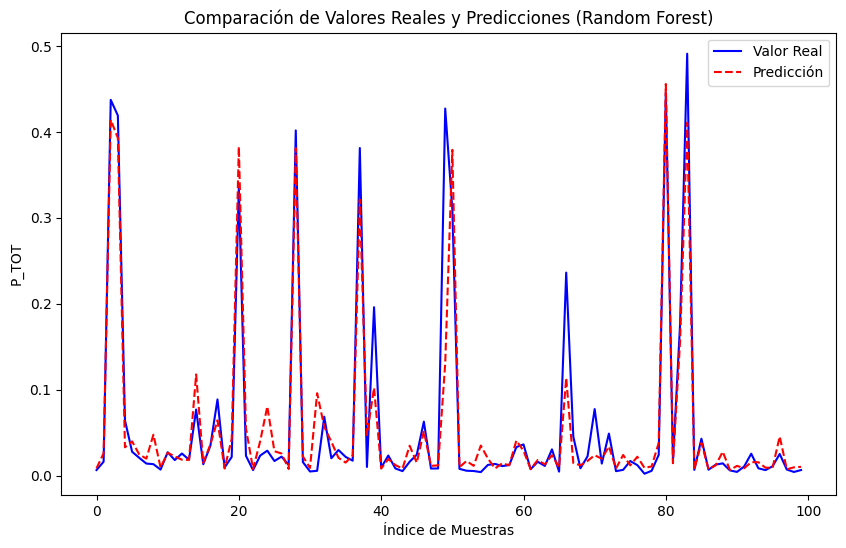

In [5]:
# Asignar las variables de entrada (X) y la variable de salida (y)
X = df_normalizado.drop(columns=['N_TOT'])  # Todas las columnas excepto 'P_TOT'
y = df_normalizado['N_TOT']  # La columna 'P_TOT' como variable de salida

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Asegurarse de que las etiquetas sean arrays unidimensionales
y_train = y_train.values
y_test = y_test.values

# Verificar las formas
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Definir el modelo Random Forest ajustando hiperparámetros
rf = RandomForestRegressor(n_estimators=339, 
                           max_depth=19, 
                           min_samples_split=2, 
                           min_samples_leaf=1, 
                           max_features='sqrt', 
                           random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluar el modelo (usando el error cuadrático medio)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

# Calcular el error absoluto máximo en el conjunto de entrenamiento y prueba
max_error_train = max_error(y_train, y_pred_train)
max_error_test = max_error(y_test, y_pred_test)

print(f'Error Absoluto Máximo en Entrenamiento: {max_error_train}')
print(f'Error Absoluto Máximo en Prueba: {max_error_test}')

# Visualización de las predicciones versus los valores verdaderos
plt.figure(figsize=(10, 6))
plt.plot(y_test[0:100], label='Valor Real', color='blue')
plt.plot(y_pred_test[0:100], label='Predicción', color='red', linestyle='--')
plt.legend()
plt.xlabel('Índice de Muestras')
plt.ylabel('P_TOT')
plt.title('Comparación de Valores Reales y Predicciones (Random Forest)')
plt.show()


In [11]:
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Lista de los nombres de las columnas (parámetros de entrada)
column_names = X_train.columns.tolist()

# Definir la función de fitness
def fitness_function(individual, X_train, y_train, X_test, y_test):
    # Extraer el vector de hiperparámetros y selección de características
    n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features_bin = individual[:5]
    selected_columns = individual[5]  # Lista de columnas seleccionadas
    
    # Seleccionar solo las columnas indicadas por el individuo
    X_train_selected = X_train[selected_columns]
    X_test_selected = X_test[selected_columns]
    
    # Definir el modelo Random Forest con los hiperparámetros del individuo
    rf = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features='sqrt' if max_features_bin > 0.5 else None,
        random_state=42
    )
    
    # Entrenar el modelo
    rf.fit(X_train_selected, y_train)
    
    # Realizar predicciones
    y_pred_test = rf.predict(X_test_selected)
    
    # Evaluar el modelo usando el error cuadrático medio (MSE)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return -mse_test  # Usamos el negativo porque el algoritmo genético maximiza la fitness

# Definir los parámetros del algoritmo genético
population_size = 20
generations = 5
mutation_rate = 0.1
crossover_rate = 0.7

# Generar un individuo aleatorio (hiperparámetros + selección de columnas)
def generate_individual():
    n_estimators = random.randint(50, 1000)
    max_depth = random.randint(5, 30)
    min_samples_split = random.randint(2, 10)
    min_samples_leaf = random.randint(1, 4)
    max_features_bin = random.random()  # Usamos un valor binario para seleccionar sqrt o None
    
    # Seleccionar un subconjunto aleatorio de columnas
    selected_columns = random.sample(column_names, random.randint(1, len(column_names)))
    
    return [n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features_bin, selected_columns]

# Generar la población inicial
population = [generate_individual() for _ in range(population_size)]

# Proceso del algoritmo genético
for generation in range(generations):
    print(f"Generación {generation + 1}")
    # Evaluar la fitness de cada individuo
    fitness_scores = [fitness_function(ind, X_train, y_train, X_test, y_test) for ind in population]
    
    # Selección de los mejores individuos
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    population = sorted_population[:population_size]  # Mantener solo los mejores
    
    # Operadores genéticos: cruce y mutación
    new_population = []
    
    for i in range(0, population_size, 2):
        parent1 = population[i]
        parent2 = population[i + 1] if i + 1 < population_size else population[0]
        
        # Cruzamiento
        if random.random() < crossover_rate:
            crossover_point = random.randint(1, len(parent1) - 2)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
        else:
            child1, child2 = parent1, parent2
        
        # Mutación en hiperparámetros
        if random.random() < mutation_rate:
            mutation_point = random.randint(0, 4)  # Solo mutamos en los primeros 5 elementos (hiperparámetros)
            child1[mutation_point] = generate_individual()[mutation_point]
        
        if random.random() < mutation_rate:
            mutation_point = random.randint(0, 4)
            child2[mutation_point] = generate_individual()[mutation_point]
        
        # Mutación en selección de columnas
        if random.random() < mutation_rate:
            child1[5] = random.sample(column_names, random.randint(1, len(column_names)))
        
        if random.random() < mutation_rate:
            child2[5] = random.sample(column_names, random.randint(1, len(column_names)))
        
        new_population.append(child1)
        new_population.append(child2)
    
    population = new_population

# Al final, el mejor individuo
best_individual = population[0]
best_fitness = fitness_function(best_individual, X_train, y_train, X_test, y_test)

print("Mejor individuo:", best_individual)
print("Mejor fitness:", best_fitness)


Mejor individuo: [339, 19, 2, 1, 0.39892618631363685, ['SDT', 'DQO_TOT', 'DBO_TOT', 'OD_%', 'N_NO3', 'ORTO_PO4', 'E_COLI', 'pH_CAMPO', 'TEMP_AGUA', 'TEMP_AMB']]
Mejor fitness: -0.0010065275090097151


In [6]:
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Lista de los nombres de las columnas (parámetros de entrada)
column_names = X_train.columns.tolist()

# Definir la función de fitness
def fitness_function(individual, X_train, y_train, X_test, y_test):
    # Extraer el vector de hiperparámetros y selección de características
    n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features_bin = individual[:5]
    selected_columns = individual[5]  # Lista de columnas seleccionadas
    
    # Seleccionar solo las columnas indicadas por el individuo
    X_train_selected = X_train[selected_columns]
    X_test_selected = X_test[selected_columns]
    
    # Definir el modelo Random Forest con los hiperparámetros del individuo
    rf = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features='sqrt' if max_features_bin > 0.5 else None,
        random_state=42
    )
    
    # Entrenar el modelo
    rf.fit(X_train_selected, y_train)
    
    # Realizar predicciones
    y_pred_test = rf.predict(X_test_selected)
    
    # Evaluar el modelo usando el error cuadrático medio (MSE)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return -mse_test, mse_test  # Regresamos el negativo como fitness y el mse original

# Definir los parámetros del algoritmo genético
population_size = 20
generations = 5
mutation_rate = 0.1
crossover_rate = 0.7

# Generar un individuo aleatorio (hiperparámetros + selección de columnas)
def generate_individual():
    n_estimators = random.randint(50, 1000)
    max_depth = random.randint(5, 30)
    min_samples_split = random.randint(2, 10)
    min_samples_leaf = random.randint(1, 4)
    max_features_bin = random.random()  # Usamos un valor binario para seleccionar sqrt o None
    
    # Seleccionar un subconjunto aleatorio de columnas
    selected_columns = random.sample(column_names, random.randint(1, len(column_names)))
    
    return [n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features_bin, selected_columns]

# Generar la población inicial
population = [generate_individual() for _ in range(population_size)]

# Proceso del algoritmo genético
for generation in range(generations):
    print(f"Generación {generation + 1}")
    # Evaluar la fitness de cada individuo y obtener también el mse
    fitness_results = [fitness_function(ind, X_train, y_train, X_test, y_test) for ind in population]
    fitness_scores = [result[0] for result in fitness_results]  # Fitness (negativo del MSE)
    mse_scores = [result[1] for result in fitness_results]  # MSE
    
    # Selección de los mejores individuos
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    population = sorted_population[:population_size]  # Mantener solo los mejores
    
    # Operadores genéticos: cruce y mutación
    new_population = []
    
    for i in range(0, population_size, 2):
        parent1 = population[i]
        parent2 = population[i + 1] if i + 1 < population_size else population[0]
        
        # Cruzamiento
        if random.random() < crossover_rate:
            crossover_point = random.randint(1, len(parent1) - 2)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
        else:
            child1, child2 = parent1, parent2
        
        # Mutación en hiperparámetros
        if random.random() < mutation_rate:
            mutation_point = random.randint(0, 4)  # Solo mutamos en los primeros 5 elementos (hiperparámetros)
            child1[mutation_point] = generate_individual()[mutation_point]
        
        if random.random() < mutation_rate:
            mutation_point = random.randint(0, 4)
            child2[mutation_point] = generate_individual()[mutation_point]
        
        # Mutación en selección de columnas
        if random.random() < mutation_rate:
            child1[5] = random.sample(column_names, random.randint(1, len(column_names)))
        
        if random.random() < mutation_rate:
            child2[5] = random.sample(column_names, random.randint(1, len(column_names)))
        
        new_population.append(child1)
        new_population.append(child2)
    
    population = new_population

# Al final, el mejor individuo
best_individual = population[0]
best_fitness, best_mse = fitness_function(best_individual, X_train, y_train, X_test, y_test)

print("Mejor individuo:", best_individual)
print("Mejor fitness (negativo del MSE):", best_fitness)
print("MSE del mejor individuo:", best_mse)


Generación 1
Generación 2
Generación 3
Generación 4
Generación 5
Mejor individuo: [640, 13, 3, 1, 0.8546110544836474, ['E_COLI', 'TEMP_AMB', 'TEMP_AGUA', 'SDT', 'OD_%', 'pH_CAMPO', 'DBO_TOT', 'COLI_FEC', 'DQO_TOT']]
Mejor fitness (negativo del MSE): -0.0015478597582495857
MSE del mejor individuo: 0.0015478597582495857
